In [1]:
# import warnings
# warnings.filterwarnings("ignore")
import numpy as np

import scipy
import os, os.path

from datetime import date
import datetime
import time

from patsy import cr

# from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sb

import sys
import io

from pylab import rcParams


In [2]:
# %config InlineBackend.print_figure_kwargs = {'bbox_inches':None}
# from pathlib import Path
# import matplotlib as mpl
# mpl.rcParams['figure.dpi']= 400
# mpl.rcdefaults()

# # plt.style.use('Figures/tufte.mplstyle')
# plt.subplots_adjust(right=1.5, top=1.1)
# pt_per_inch = 72.27
# marginwidth_inch = 144.0/pt_per_inch
# textwidth = 312.0/pt_per_inch
# textheight = 616.0/pt_per_inch



In [3]:
plot_dir = "/Users/hn/Documents/00_GitHub/Learning_Notes/00_figures/"
os.makedirs(plot_dir, exist_ok=True)

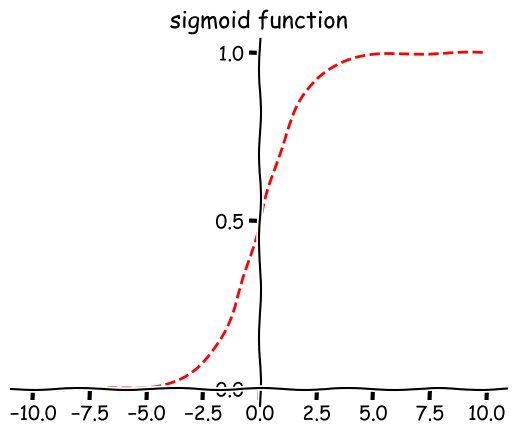

In [4]:
x = np.arange(-10, 10, 0.1) # np.linspace(0,1,100)
sigmoid = 1/(1 + np.exp(-x))

with plt.xkcd():
    plt.plot(x, sigmoid, "--", c="red")
    
    # use set_position. Set the origin as center of the plot
    ax = plt.gca()
    ax.spines['top'].set_color('none')
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')

    plt.locator_params(axis="y", nbins=4)
    plt.title('sigmoid function')
    # plt.grid(True)
    
    file_name = plot_dir + "sigmoid_function_1.pdf"
    plt.savefig(fname = file_name, dpi=400, bbox_inches='tight', transparent=False)

In [5]:
with plt.xkcd():
    plt.plot(x, sigmoid, "--", c="red")
    plt.title('sigmoid function')
    # plt.grid(True)
    
    file_name = plot_dir + "sigmoid_function.pdf"
    plt.savefig(fname = file_name, dpi=400, bbox_inches='tight', transparent=False)

In [6]:
x = np.arange(-10, 10, 0.1) # np.linspace(0,1,100)
tanh = (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

with plt.xkcd():
    plt.plot(x, tanh, "--", c="red")

    plt.locator_params(axis="y", nbins=5)
    plt.locator_params(axis="x", nbins=5)
    plt.title('tanh(x)')
    plt.grid(True)
    
    file_name = plot_dir + "tanh_function.pdf"
    plt.savefig(fname = file_name, dpi=400, bbox_inches='tight', transparent=False)

In [7]:
with plt.xkcd():
    plt.plot(x, tanh, "--", c="red")

    # use set_position. Set the origin as center of the plot
    ax = plt.gca()
    ax.spines['top'].set_color('none')
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')

    plt.locator_params(axis="y", nbins=5)
    plt.locator_params(axis="x", nbins=5)    

    plt.title('tanh(x)')
    
    file_name = plot_dir + "tanh_function_1.pdf"
    plt.savefig(fname = file_name, dpi=400, bbox_inches='tight', transparent=False)

# ReLu

In [8]:
def rectified(x):
    return max(0.0, x)
 
# define a series of inputs
series_in = [x for x in range(-10, 11)]

# calculate outputs for our inputs
series_out = [rectified(x) for x in series_in]


In [9]:
with plt.xkcd():
    plt.plot(series_in, series_out, "--", c="red")
    
#     # use set_position. Set the origin as center of the plot
#     ax = plt.gca()
#     ax.spines['top'].set_color('none')
#     ax.spines['left'].set_position('zero')
#     ax.spines['right'].set_color('none')
#     ax.spines['bottom'].set_position('zero')

    plt.title('ReLu(x)')
    plt.locator_params(axis="y", nbins=5)
    plt.locator_params(axis="x", nbins=5)    
    
    file_name = plot_dir + "reLu.pdf"
    plt.savefig(fname = file_name, dpi=400, bbox_inches='tight', transparent=False)

# Cost function

In [10]:
x = np.arange(sys.float_info.epsilon, 1, 0.01) # np.linspace(0,1,100)
inverseX = 1.0 / x

noise = np.random.randn(len(x))
noisyinverseX = inverseX + noise

with plt.xkcd():
    plt.plot(x*100, noisyinverseX, "-", c="blue", label="batch cost")
    plt.plot(x*100, inverseX, "--", c="red", linewidth=3, label="mini-batch cost")

    
    plt.locator_params(axis="y", nbins=5)
    plt.locator_params(axis="x", nbins=5)
    plt.ylim([0, 20])
    plt.title('cost function')
    plt.xlabel('iteration')
    plt.legend()
    
    file_name = plot_dir + "costFunction.pdf"
    plt.savefig(fname = file_name, dpi=400, bbox_inches='tight', transparent=False)

## Create a grid

In [13]:
import libpysal
from libpysal.cg import Point
import matplotlib
import matplotlib.pyplot as plt
import spaghetti

/Users/hosseinnoorazar/opt/anaconda3/lib/python3.9/site-packages/spaghetti/util.py:13: UserWarning: geopandas/shapely not available. Some functionality will be disabled.
  warn(msg)
/Users/hosseinnoorazar/opt/anaconda3/lib/python3.9/site-packages/spaghetti/network.py:39: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(f"{dep_msg}", FutureWarning)


In [16]:
lattice = spaghetti.regular_lattice((1, 1, 5, 5), 3, exterior=True)
ntw = spaghetti.Network(in_data=lattice)

In [17]:
vertices, arcs = spaghetti.element_as_gdf(ntw, vertices=True, arcs=True)

missing dependencies: ['geopandas', 'shapely']
not running element_as_gdf


TypeError: cannot unpack non-iterable NoneType object

In [18]:
with plt.xkcd():
    plt.figure(figsize=(5,5))
    base = arcs.plot(linewidth=0.2, alpha=0.1, color="k", zorder=0)
    vertices.plot(ax=base, markersize=30, color="red", zorder=-10);
    plt.xlabel('learning rate')
    plt.ylabel('$\epsilon$')

    file_name = plot_dir + "2D_lattice.pdf"
    plt.savefig(fname = file_name, dpi=400, bbox_inches='tight', transparent=False)

NameError: name 'arcs' is not defined

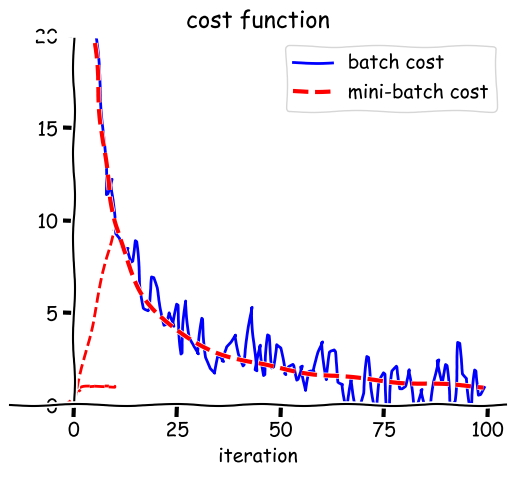

<Figure size 500x500 with 0 Axes>

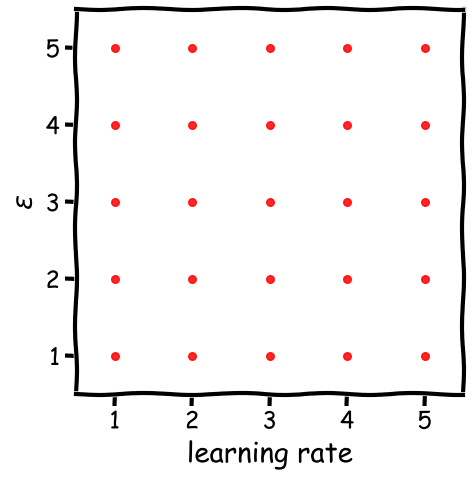

In [19]:
x = np.repeat(range(1, 6), 5)
y = np.tile(range(1, 6), 5)

with plt.xkcd():
    # plt.figure(figsize=(5,5))
    fig, ax = plt.subplots(figsize=(5,5))
    ax.tick_params(axis='both', which='major', labelsize=17)
    plt.setp(ax.spines.values(), linewidth=5)
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(3)
        
    plt.scatter(x, y, s=30, c="red", alpha=0.85) # s=areas, c=colors
    plt.axis([0.0, 5.0, 0.0, 5.0]);
    plt.xlabel('learning rate', fontsize=20);
    plt.ylabel('$\epsilon$', fontsize=20);
    plt.xlim([0.5, 5.50])
    plt.ylim([0.5, 5.50])
#    ax.tick_params(axis='both', which='major', labelsize=10)
    
    file_name = plot_dir + "grid_2D.pdf"
    plt.savefig(fname = file_name, dpi=400, bbox_inches='tight', transparent=False);
    plt.show();
    


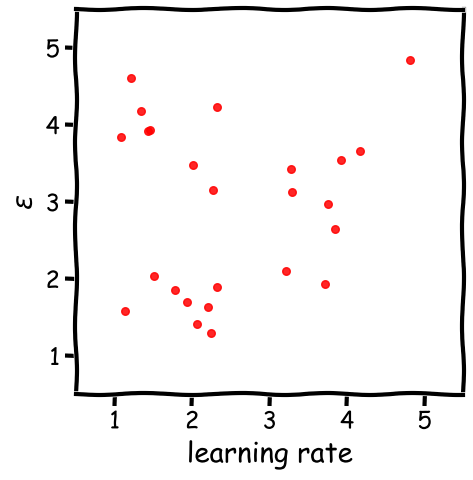

In [20]:
import math
import random

# create random data
no_of_balls = 25
x = [np.random.uniform(low=1.0, high=5.0) for i in range(no_of_balls)]
y = [np.random.uniform(low=1.0, high=5.0) for i in range(no_of_balls)]
# colors = [random.randint(1, 5) for i in range(no_of_balls)]
# areas = [math.pi * random.randint(5, 15)**2 for i in range(no_of_balls)]
# draw the plot

x = np.random.uniform(low=1.0, high=5.0, size=25)
y = np.random.uniform(low=1.0, high=5.0, size=25)
with plt.xkcd():
    fig, ax = plt.subplots(figsize=(5,5))
    ax.tick_params(axis='both', which='major', labelsize=17)
    plt.setp(ax.spines.values(), linewidth=5)
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(3)

    # plt.figure(figsize=(5,5))
    plt.scatter(x, y, s=30, c="red", alpha=0.85) # s=areas, c=colors
    plt.axis([0.0, 5.0, 0.0, 5.0]);
    
    plt.xlabel('learning rate', fontsize=20);
    plt.ylabel('$\epsilon$', fontsize=20);
    plt.xlim([0.5, 5.50])
    plt.ylim([0.5, 5.50])
    
    
    file_name = plot_dir + "random_2D.pdf"
    plt.savefig(fname = file_name, dpi=400, bbox_inches='tight', transparent=False);

    plt.show();
    


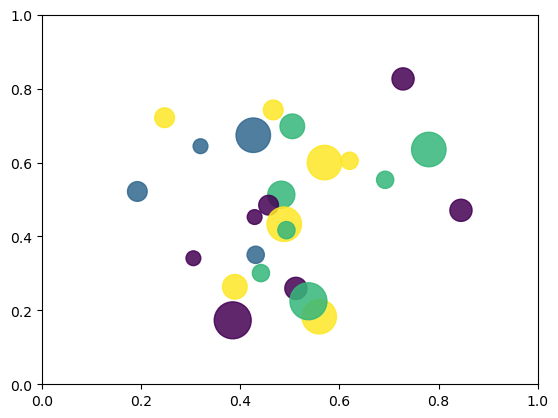

In [21]:
import math
import random

# create random data
no_of_balls = 25
x = [random.triangular() for i in range(no_of_balls)]
y = [random.gauss(0.5, 0.25) for i in range(no_of_balls)]
colors = [random.randint(1, 4) for i in range(no_of_balls)]
areas = [math.pi * random.randint(5, 15)**2 for i in range(no_of_balls)]
# draw the plot
plt.figure()
plt.scatter(x, y, s=areas, c=colors, alpha=0.85)
plt.axis([0.0, 1.0, 0.0, 1.0])
plt.show()

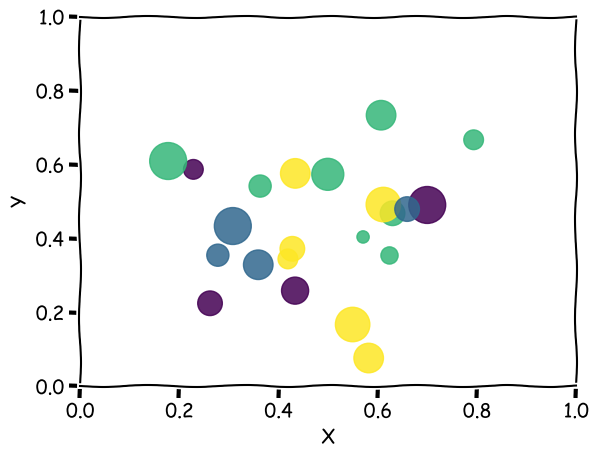

In [22]:
# create random data
no_of_balls = 25
x = [random.triangular() for i in range(no_of_balls)]
y = [random.gauss(0.5, 0.25) for i in range(no_of_balls)]
colors = [random.randint(1, 4) for i in range(no_of_balls)]
areas = [math.pi * random.randint(5, 15)**2 for i in range(no_of_balls)]
# draw the plot

with plt.xkcd():
    plt.figure()
    plt.scatter(x, y, s=areas, c=colors, alpha=0.85)
    plt.axis([0.0, 1.0, 0.0, 1.0])
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()
